# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [ ]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")# Create two new dataframes

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?

In [ ]:
# EDA Question 1A solution below:
north_reps = north_df["Rep ID"].nunique()
north_reps

9

In [ ]:
Reps in the North Branch = 9 

#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
# EDA Question 1B solution Below:
south_reps = south_df["Rep ID"].nunique()
south_reps

11

In [ ]:
Reps in the South Branch = 11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [6]:
# EDA Question 2A solution Below:
north_avg = north_df[[
    "Busy Minutes",
    "Not Ready Minutes",
    "Incoming Wait Time",
    "During Call Wait Time"
]].mean().round(2)

north_avg

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [7]:
# EDA Question 2B solution Below:
south_avg = south_df[[
    "Busy Minutes",
    "Not Ready Minutes",
    "Incoming Wait Time",
    "During Call Wait Time"
]].mean().round(2)

south_avg


Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [8]:
# EDA Question 3 solution Below:
total_calls_time = pd.concat([north_df, south_df]) \
    .groupby("Time Block")["Calls"] \
    .sum()

total_calls_time


Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [9]:
# Question 1 solution below
north_df.isna().sum()
south_df.isna().sum()


Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

#### Record your answer below:

> Your Answer:Yes, there is missing data in the dataset.

From the results, only one column has missing values:

Incoming Wait Time → 188 missing values

All other columns have 0 missing values

I would replace the missing Incoming Wait Time values with the column average to maintain data accuracy and avoid losing important call records.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [ ]:
# Cleaning Question 2 solution below:


##### Record your answer by below:
> Your Answer: 
There were two different versions of “YES” in the Sale column (for example: "YES" and "Yes").
 This usually happens due to manual data entry
 The two “YES” values existed due to inconsistent text formatting. 
 I fixed this by standardizing the column so all values use the same format.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [11]:
# Cleaning Question 3 solution below:
north_df.duplicated().sum()

# Check duplicates in South dataset
south_df.duplicated().sum()

np.int64(0)

##### Record your answer below:
> Your Answer: 
I checked both the North and South datasets for duplicate records using the .duplicated().sum() function. The result returned 0, which means there are no duplicate rows in either dataset. Since no duplicates were found, no records needed to be removed.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [12]:
# Cleaning Question 4 solution below:
# Remove the unnecessary index column from North dataset
north_df = north_df.drop(columns=["Unnamed: 0"])

# Remove the unnecessary index column from South dataset
south_df = south_df.drop(columns=["Unnamed: 0"])


In [13]:
north_df.columns
south_df.columns

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

##### Record your answer below:
> Your Answer: 
The “Unnamed: 0” column was unnecessary since it only represented the file index.
 I removed it to keep the dataset clean and relevant.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [14]:
# Create dataframe for the entire company named df

df = pd.concat([north_df, south_df], ignore_index=True)

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [15]:
# Manipulation Question solution below:
north_top = north_df.groupby("Rep ID")["Calls"].sum().idxmax(), \
            north_df.groupby("Rep ID")["Calls"].sum().max()

south_top = south_df.groupby("Rep ID")["Calls"].sum().idxmax(), \
            south_df.groupby("Rep ID")["Calls"].sum().max()

north_top, south_top

(('Brent', np.int64(37)), ('Eric', np.int64(35)))

##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent
- South Branch = Eric

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [16]:
# Manipulation Question 2 solution below:
north_abandon = (north_df["Abandoned"].sum() / north_df["Calls"].sum() * 100).round(2)
south_abandon = (south_df["Abandoned"].sum() / south_df["Calls"].sum() * 100).round(2)
company_abandon = (df["Abandoned"].sum() / df["Calls"].sum() * 100).round(2)

north_abandon, south_abandon, company_abandon

(np.float64(2.86), np.float64(1.27), np.float64(1.97))

##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%?
NO

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [17]:
# Manipulation Question 3 solution below:
north_service = (north_df[north_df["Incoming Wait Time"] <= 2].shape[0] / north_df.shape[0]) * 100
south_service = (south_df[south_df["Incoming Wait Time"] <= 2].shape[0] / south_df.shape[0]) * 100
company_service = (df[df["Incoming Wait Time"] <= 2].shape[0] / df.shape[0]) * 100

north_service, south_service, company_service


(13.46938775510204, 15.286624203821656, 14.490161001788909)

##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.46938775510204
- South Branch = 15.286624203821656
- Company Wide = 14.490161001788909

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [18]:
# Manipulation Question 4 solution below:
north_speed = north_df["Incoming Wait Time"].mean().round(2)
south_speed = south_df["Incoming Wait Time"].mean().round(2)
company_speed = df["Incoming Wait Time"].mean().round(2)

north_speed, south_speed, company_speed

(np.float64(3.05), np.float64(3.0), np.float64(3.02))

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\madhu\AppData\Local\Temp\ipykernel_13580\808476535.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]
C:\Users\madhu\AppData\Local\Temp\ipykernel_13580\808476535.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


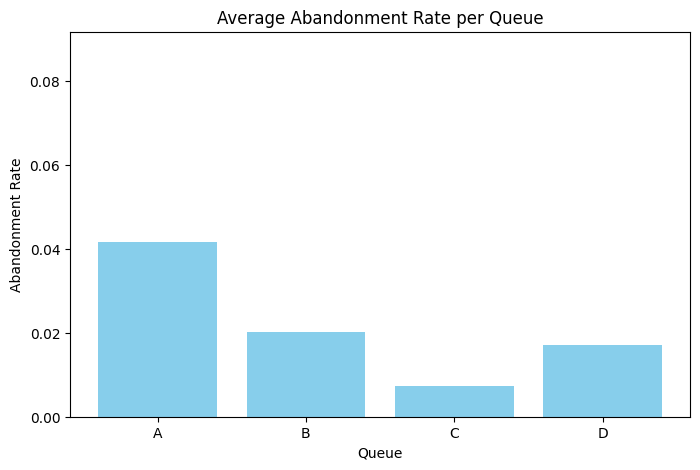

In [20]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 


import matplotlib.pyplot as plt

# Abandonment rates calculated earlier
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]

# Prepare data for plotting
queues = list(abandonment_rates.keys())
rates = list(abandonment_rates.values())

# Create a bar chart
plt.figure(figsize=(8,5))
plt.bar(queues, rates, color='skyblue')
plt.title("Average Abandonment Rate per Queue")
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate")
plt.ylim(0, max(rates)+0.05)  # small padding above max rate
plt.show()


##### Record your answer below:

> Chart style you chose and why: 
Bar Chart – This is ideal for comparing values across different categories (queues in this case). It makes it easy to see which queue has the highest or lowest abandonment rate at a glance.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

AttributeError: 'Axes' object has no attribute 'plo'

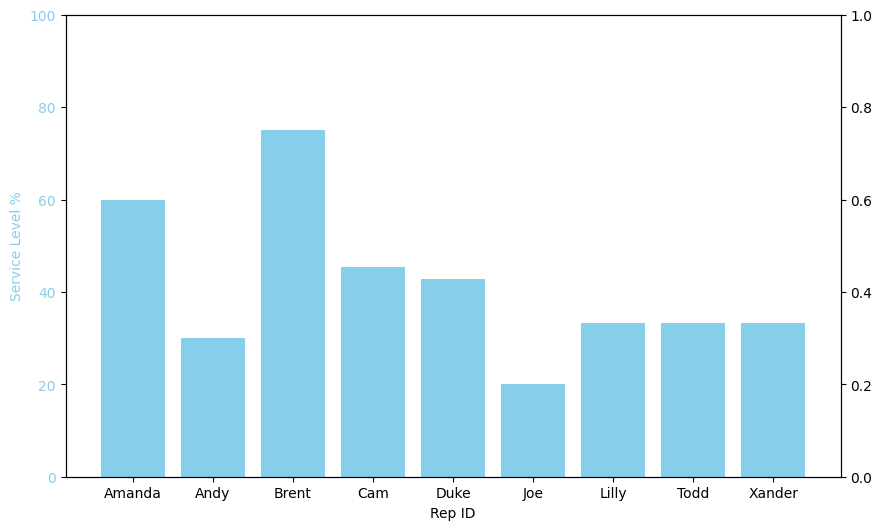

##### Record your answer below:

> Chart style you chose and why: 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

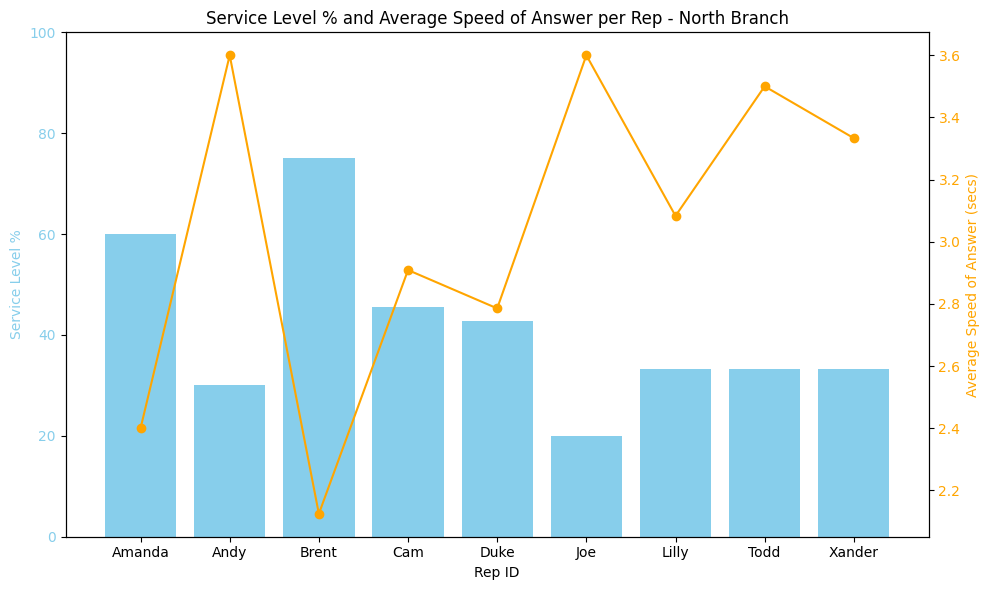

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load North Branch data
north = pd.read_csv("NorthCallCenter.csv")

# Average Speed of Answer per Rep
avg_speed = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
avg_speed.rename(columns={"Incoming Wait Time": "Avg Speed (secs)"}, inplace=True)

# Service Level % per Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_stats = quick_calls.groupby("Rep ID")["Calls"].sum().to_frame().rename(columns={"Calls": "Quick Calls"})

total_calls = north[north["Incoming or Outgoing"] == "Incoming"]
total_stats = total_calls.groupby("Rep ID")["Calls"].sum().to_frame().rename(columns={"Calls": "Total Calls"})

service_level = pd.merge(quick_stats, total_stats, left_index=True, right_index=True)
service_level["Service Level %"] = (service_level["Quick Calls"] / service_level["Total Calls"]) * 100

# Merge with average speed
rep_stats = pd.merge(avg_speed, service_level[["Service Level %"]], left_on="Rep ID", right_index=True)
rep_stats.set_index("Rep ID", inplace=True)

# Create combined bar + line chart
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(rep_stats.index, rep_stats["Service Level %"], color='skyblue')
ax1.set_xlabel("Rep ID")
ax1.set_ylabel("Service Level %", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_ylim(0, 100)

ax2 = ax1.twinx()
ax2.plot(rep_stats.index, rep_stats["Avg Speed (secs)"], color='orange', marker='o')
ax2.set_ylabel("Average Speed of Answer (secs)", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title("Service Level % and Average Speed of Answer per Rep - North Branch")
fig.tight_layout()
plt.show()


##### Record your answer below:

> Chart style you chose and why: 
Combination chart (Bar + Line) – Bars show Service Level %, which is easy to compare across reps, while the line shows Average Speed of Answer, giving a second metric on the same plot. This lets us compare both metrics at once and identify reps performing well on both dimensions.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
 > Your Answer:The South Branch is working more efficiently. It has a lower average abandonment rate (1.27% vs. 2.86% for North), which means fewer customers hang up before talking to a rep. The North Branch has more variation in how fast reps answer calls and in service level %, showing that some reps are slower or less consistent. This makes South Branch more reliable overall.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer:The North Branch would benefit from extra help. Some reps are slower and the branch has a higher abandonment rate. Adding more staff or support could reduce wait times, lower abandonment, and make service more consistent for customers. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 

Call volume by time of day to see busy periods

Rep shift schedules to check if some shifts are slower

Customer satisfaction scores to know how happy customers are

Call outcomes (like resolved, escalated, or dropped) to check service quality

South Branch rep-level data to compare individual rep performance between branches


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [27]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: